# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Dhulipati Lakshmi Girija<br>
Roll Number: 2020101027

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [2]:
import csv
import random
import numpy as np

In [3]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
Linear regression will be implemented using the mSE loss fumction. ie $\Sigma$ (y_pred - y)^2<br>
Then I plan to use gradient descent to minimise the training error. Gradient descent calculates how the<br>
gradient varies with respect to each value of wi. It tries to minimize wi with the following equation:<br>
wi = wi - n * dLoss/dwi<br>
Here n is the learning rate.<br>
We find DLoss/dwi for all the training sets, add them up and divide by number of training samples and then<br>
we use the above function to calculate the best wi.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.<br>
I achieved the best MSE for n = 0.45

In [11]:
# implement Linear Regression
N = [0.01, 0.02, 1 , 2, 5, 0.01, 0.5, 0.55, 0.45]
for n in N:
    w1 = np.random.uniform(0,1)
    w2 = np.random.uniform(0,1)
    w3 = np.random.uniform(0,1)
    w4 = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    lw1 = 0
    lw2 = 0
    lw3 = 0
    lw4 = 0
    lb = 0
    Loss = 0
    for i in range(1000):
        lw1 = 0
        lw2 = 0
        lw3 = 0
        lw4 = 0
        lb = 0
        Loss = 0
        for i in range(len(x_train)):
            y_pred = w1*x_train[i][0] + w2*x_train[i][1] + w3*x_train[i][2] + w4*x_train[i][3] + b
            l = y_pred - y_train[i]
            Loss = Loss + l*l
    #         print(l)
            lw1 += 2 * l * x_train[i][0]
            lw2 += 2 * l * x_train[i][1]    
            lw3 += 2 * l * x_train[i][2]
            lw4 += 2 * l * x_train[i][3]
            lb += 2 * l 
        lw1 = lw1/len(x_train)
        lw2 = lw2/len(x_train)    
        lw3 = lw3/len(x_train)    
        lw4 = lw4/len(x_train)
        lb = lb/len(x_train)
        w1 = w1 - n * lw1
        w2 = w2 - n * lw2    
        w3 = w3 - n * lw3    
        w4 = w4 - n * lw4  
        b = b - n * lb
        Loss = Loss/len(x_train)

    print(Loss)    
    print(w1,w2,w3,w4,b)

0.008130217097396239
0.12263673878624312 -0.047489028556034006 1.5065036074995652 0.7403703620759139 1.5092768269027832
0.0053938751732366475
0.01384370541966678 -0.12157758860005206 1.5034459271735532 0.6474984771479029 1.5942583428428725
inf
-5.019639046640424e+246 -1.992938680895144e+247 -4.268851445333566e+246 -1.5299707422244536e+247 -4.067480723945011e+247
nan
nan nan nan nan nan
nan
nan nan nan nan nan
0.012329653390663938
0.2681960674094021 -0.00891238479565621 1.527301579443606 0.7497708967854282 1.466693391462593
0.004942378092365193
-0.023268522867537316 -0.11222761185454402 1.57536993587041 0.6260800283964258 1.5947651375705567
0.004942378092365194
-0.023268522867538496 -0.11222761185454616 1.5753699358704054 0.6260800283964241 1.5947651375705592
0.004942378092365193
-0.02326852286753512 -0.11222761185454141 1.5753699358704143 0.6260800283964281 1.5947651375705538


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

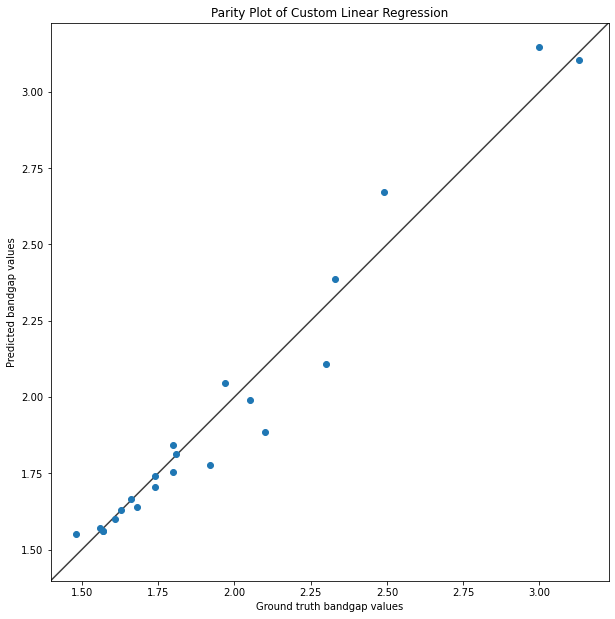

In [12]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

y_pred = []
for i in range(len(x_test)):
    y_pred.append(w1*x_test[i][0] + w2*x_test[i][1] + w3*x_test[i][2] + w4*x_test[i][3] + b)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
1. The model-tuning method known as ridge regression may be used to analyse any multi collinear data.
2. Min(||Y - X(w)||2 + alpha * ||w||2) is the cost function used.

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [14]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge

alph = [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 2]
RSME = []
for i in range(len(alph)):
    mdl = Ridge(alpha = alph[i])
    mdl = mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    RSME.append(np.sqrt(np.mean((y_pred-y_test)*(y_pred-y_test))))

print("Alpha"," RSME")
for i in range(len(alph)):
    print(alph[i],RSME[i])
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

Alpha  RSME
0.0001 0.09127611456922272
0.005 0.09109878581101469
0.001 0.09124332532963382
0.01 0.09092083893417711
0.1 0.08822456683072467
1 0.09738595371773497
2 0.12999919155352407


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso  regression is a method of regularization. Instead of using regression models, it is used to make a forecast that is more accurate. In this model, shrinkage usually tends to mean.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [16]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
import sklearn
from sklearn.linear_model import Lasso

alph = [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 2]
RSME = []
for i in range(len(alph)):
    mdl = Lasso(alpha = alph[i])
    mdl = mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    RSME.append(np.sqrt(np.mean((y_pred-y_test)*(y_pred-y_test))))

print("Alpha"," RSME")
for i in range(len(alph)):
    print(alph[i],RSME[i])

Alpha  RSME
0.0001 0.09117567288072904
0.005 0.08799488515877493
0.001 0.09051853859193094
0.01 0.09146377044172971
0.1 0.4404100503596709
1 0.44090452384256296
2 0.44090452384256296
